Assignment 1 : Advanced Machine Learnig

by- Vaishnavi Haripuri

student ID- 811285838

Email- vharipur@kent.edu

#Importing data

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Printing data

In [ ]:
print(train_data[0])
print(train_labels[0])
[1, 14, 22, 16, ..., 178, 32]
1
print(train_data[0][:10])
# Print the first 10 elements

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]


In [ ]:
max([max(sequence) for sequence in train_data])

9999

#Preparing data

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#Division of training data and test data
#Vectorizing

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#converting labels to floats

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#Taking validation set out

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Hypertuning as per conditions

Using 1 hidden layer

using more hidden units

using mse loss function

using tanh activation

#Building network

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(10000,)),
    # One hidden layer
    layers.Dense(1, activation='sigmoid')
])


#Compilation

In [ ]:
model.compile(optimizer="rmsprop",
            loss="mse",
            metrics=["accuracy"])

#Training model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.6632 - loss: 0.2053 - val_accuracy: 0.8548 - val_loss: 0.1203
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8939 - loss: 0.0993 - val_accuracy: 0.8691 - val_loss: 0.1016
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9007 - loss: 0.0822 - val_accuracy: 0.8769 - val_loss: 0.0926
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9180 - loss: 0.0687 - val_accuracy: 0.8782 - val_loss: 0.0903
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.9356 - loss: 0.0573 - val_accuracy: 0.8738 - val_loss: 0.0918
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9395 - loss: 0.0524 - val_accuracy: 0.8485 - val_loss: 0.1100
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9433 - loss: 0.0498 - val_accuracy: 0.8696 - val_loss: 0.0963
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9476 - loss: 0.0444 - val_accuracy: 0.8847 -

#Plotting loss and accuracy scores

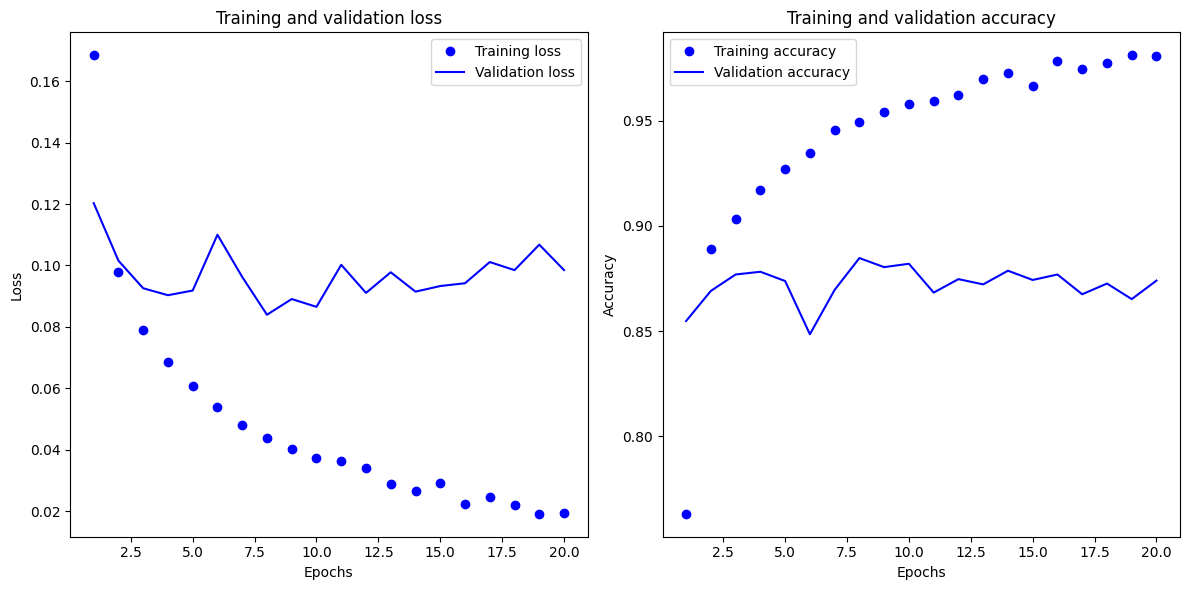

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
predictions = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [ ]:
binary_predictions = (predictions > 0.5).astype(int)


In [ ]:
print("Predictions vs Actual:")
for i in range(5):
    print(f"Predicted: {binary_predictions[i][0]}, Actual: {y_test[i]}")



Predictions vs Actual:
Predicted: 0, Actual: 0.0
Predicted: 1, Actual: 1.0
Predicted: 0, Actual: 1.0
Predicted: 1, Actual: 0.0
Predicted: 0, Actual: 1.0


#Adding dropout

In [ ]:
model_dropout = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(10000,)),
    layers.Dropout(0.5),  # 50% dropout
    layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])


In [ ]:
history_dropout = model_dropout.fit(partial_x_train,
                                     partial_y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_val, y_val),
                                     verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.6838 - loss: 0.2010 - val_accuracy: 0.8335 - val_loss: 0.1303
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.8777 - loss: 0.1068 - val_accuracy: 0.8820 - val_loss: 0.0957
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9056 - loss: 0.0820 - val_accuracy: 0.8775 - val_loss: 0.0922
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9174 - loss: 0.0707 - val_accuracy: 0.8883 - val_loss: 0.0845
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.9284 - loss: 0.0610 - val_accuracy: 0.8615 - val_loss: 0.1001
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9273 - loss: 0.0593 - val_accuracy: 0.8864 - val_loss: 0.0829
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9448 - loss: 0.0500 - val_accuracy: 0.8862 - val_loss: 0.0837
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9501 - loss: 0.0461 - val_accuracy: 0.8595 

#Plotting after adding dropout

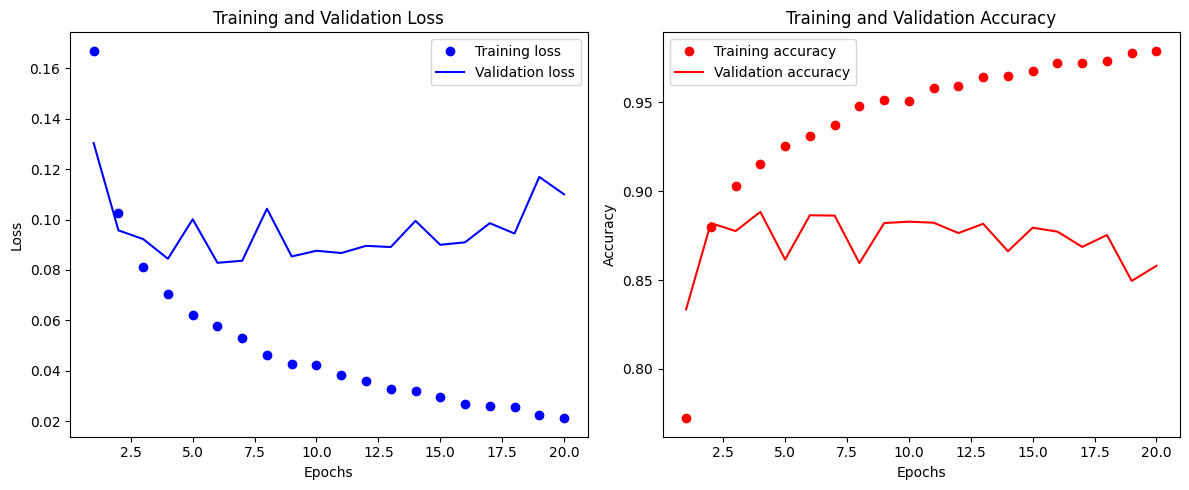

In [ ]:
# Retrieve the history of loss and accuracy from the training process
history_dict = history_dropout.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Plotting the loss and accuracy

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' is for solid blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')  # 'ro' is for red dot
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')  # 'r' is for solid red line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjusts subplot spacing to prevent overlap
plt.show()

#Evaluate the model on the test set

In [ ]:
results = model_dropout.evaluate(x_test, y_test)
print("Test Loss, Test Accuracy:", results)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8464 - loss: 0.1201
Test Loss, Test Accuracy: [0.11903790384531021, 0.8479599952697754]


# Make predictions on the test set

In [ ]:
predictions = model_dropout.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


# Convert probabilities to binary predictions (0 or 1)


In [ ]:
predicted_classes = (predictions > 0.5).astype(int)


# Print the first few predictions and their corresponding actual labels


In [ ]:
for i in range(5):
    print(f"Predicted: {predicted_classes[i][0]}, Actual: {y_test[i]}")


Predicted: 0, Actual: 0.0
Predicted: 1, Actual: 1.0
Predicted: 1, Actual: 1.0
Predicted: 1, Actual: 0.0
Predicted: 1, Actual: 1.0


Predicted: 1 means the model predicts a positive review.


Predicted: 0 means the model predicts a negative review.